In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import matplotlib
sns.set_style('white')

In [54]:
X = np.loadtxt('../data/double_well_KT=1.data')

In [55]:
X = X.T[1]

25-09-18 16:00:19 pyemma.coordinates.clustering.kmeans.KmeansClustering[18] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


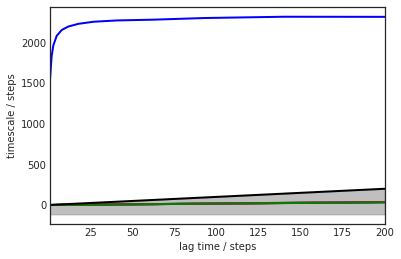

In [56]:
n_clusters = 20   # number of k-means clusters

clustering = coor.cluster_kmeans(X,k=n_clusters) # calculate clusters with kmeans
dtrajs = clustering.dtrajs
cc_x = clustering.clustercenters[:,0]
its = msm.timescales_msm(dtrajs, lags=200, nits=10)
# matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
# plt.xlim(0, 40); plt.ylim(0, 120);
# plt.show()


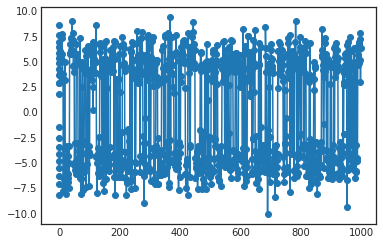

In [74]:
cc_x = clustering.clustercenters[:,0]
plt.plot(X[::1000],'-o')
plt.scatter(np.zeros_like(cc_x),cc_x)

In [58]:
its = msm.timescales_msm(dtrajs, lags=20, nits=10)


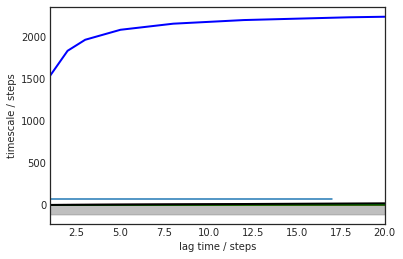

In [59]:
# plt.ylim((0,10))
# plt.xlim((0,10))

mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
# plt.ylim((0,10))
plt.plot(np.mean(np.diff(s))/2*np.ones(18))
# plt.xlim((0,10))

In [60]:
np.mean(np.diff(s))/2 * np.ones_like(its)

73.44340732029987

In [46]:
its.shape

AttributeError: 'ImpliedTimescales' object has no attribute 'shape'

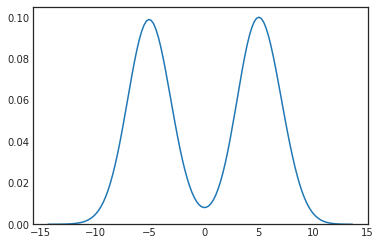

In [61]:
sns.kdeplot(X[::1000])

How much time does it take until a crossing event?

In [62]:
s  = [i for i,x in enumerate(X[:-1]) if X[i]*X[i+1]<0]

What is the mean time of crossing?

In [63]:
np.mean(np.diff(s))/its.get_timescales()[-1][0]

1.8141751016697303

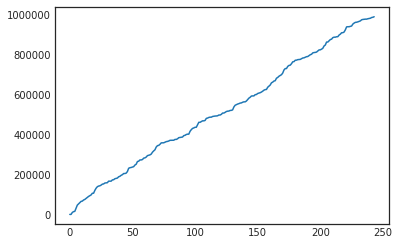

In [64]:
plt.plot(s)

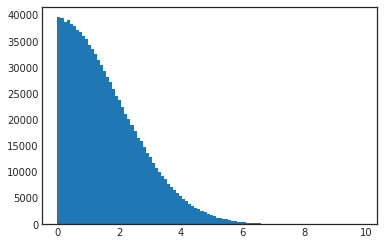

In [66]:
h = plt.hist(np.abs(np.diff(X)),100)

In [67]:
np.mean(np.abs(np.diff(X)))

1.5944706252835374

In [68]:
its.get_timescales()[-1][0]

2236.409638404458